<a href="https://colab.research.google.com/github/itz-jai/Stock-Trade-Predictor/blob/main/Stock_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Get the stock quote 
df = web.DataReader('^NSEI', data_source='yahoo', start='2000-04-28', end='2020-07-15') 
#Show the data 
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2007-09-17,4549.049805,4482.850098,4518.450195,4494.649902,0.0,4494.649902
2007-09-18,4551.799805,4481.549805,4494.100098,4546.200195,0.0,4546.200195
2007-09-19,4739.000000,4550.250000,4550.250000,4732.350098,0.0,4732.350098
2007-09-20,4760.850098,4721.149902,4734.850098,4747.549805,0.0,4747.549805
2007-09-21,4855.700195,4733.700195,4752.950195,4837.549805,0.0,4837.549805
...,...,...,...,...,...,...
2020-07-10,10819.400391,10713.000000,10764.099609,10768.049805,590700.0,10768.049805
2020-07-13,10894.049805,10756.049805,10851.849609,10802.700195,554100.0,10802.700195
2020-07-14,10755.650391,10562.900391,10750.849609,10607.349609,532400.0,10607.349609


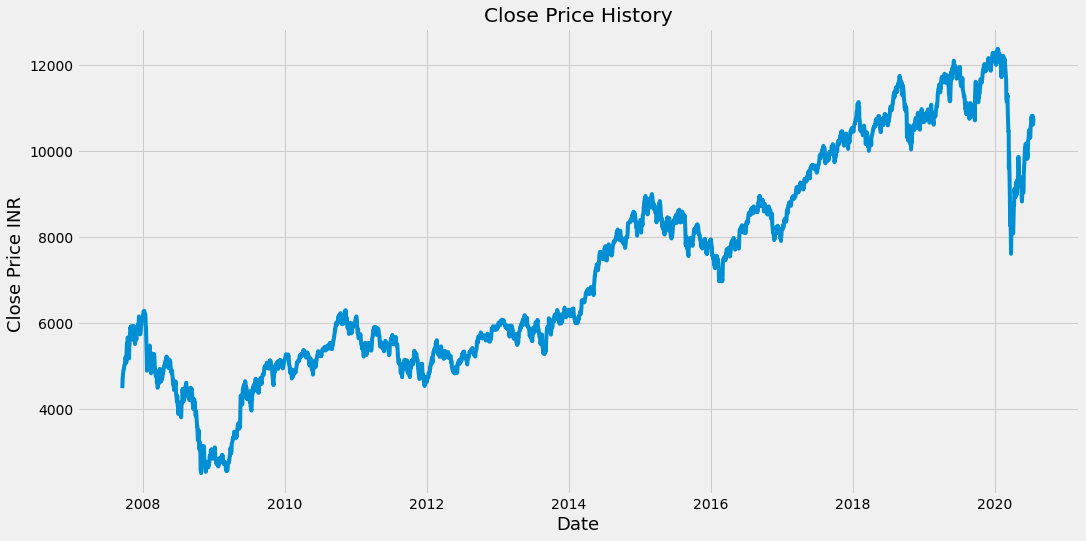

In [ ]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price INR ',fontsize=18)
plt.show()

In [ ]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8) 
training_data_len

2506

In [ ]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.20028766],
       [0.20552752],
       [0.22444884],
       ...,
       [0.82161696],
       [0.82271987],
       [0.83509523]])

In [ ]:
import datetime as dt
df["Date"] = df.index
df['Date']=pd.to_datetime(df.Date,format='%Y-%m-%d')
df['Date']= df['Date'].map(dt.datetime.toordinal)
df

,High,Low,Open,Close,Volume,Adj Close,Date
Date,,,,,,,
2007-09-17,4549.049805,4482.850098,4518.450195,4494.649902,0.0,4494.649902,732936
2007-09-18,4551.799805,4481.549805,4494.100098,4546.200195,0.0,4546.200195,732937
2007-09-19,4739.000000,4550.250000,4550.250000,4732.350098,0.0,4732.350098,732938
2007-09-20,4760.850098,4721.149902,4734.850098,4747.549805,0.0,4747.549805,732939
2007-09-21,4855.700195,4733.700195,4752.950195,4837.549805,0.0,4837.549805,732940
...,...,...,...,...,...,...,...
2020-07-10,10819.400391,10713.000000,10764.099609,10768.049805,590700.0,10768.049805,737616
2020-07-13,10894.049805,10756.049805,10851.849609,10802.700195,554100.0,10802.700195,737619
2020-07-14,10755.650391,10562.900391,10750.849609,10607.349609,532400.0,10607.349609,737620


In [ ]:
X = df.filter(['Date'])
X

,Date
Date,
2007-09-17,732936
2007-09-18,732937
2007-09-19,732938
2007-09-20,732939
2007-09-21,732940
...,...
2020-07-10,737616
2020-07-13,737619
2020-07-14,737620


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, data, test_size = 0.2, random_state = 1) 

In [ ]:
from sklearn.linear_model import LinearRegression
linr = LinearRegression();
linr.fit(X_train, Y_train);

In [ ]:
predictions = linr.predict(X_test)

In [ ]:
rmse=np.sqrt(np.mean(((predictions-Y_test)**2)))
rmse

Close    899.562375
dtype: float64